# Minimal working example

### Import packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lgrt4gps.lgrtn import LGRTN

### Generate synthetic dataset

In [6]:
# set input / output dimnesions
dx, dy = 1, 1
    
# number of training /test  points
ntr, nte = 300, 100
f = lambda x: np.sin(x[:, :1])

# generate training data
xtr = np.random.uniform(1, 9,size=(ntr, dx))
ytr = f(xtr)

# generate test data
xte = np.linspace(0, 10, nte).reshape(-1,1)
yte = f(xte)


### Process LGRT

In [7]:
# initialize LGRT
lgrt_gp = LGRTN(dx, dy)

# add data to LGRT
lgrt_gp.add_data(xtr,ytr)

# make predictions
mu, s2 = lgrt_gp.predict(xte)                                        
                                     

### Visualize result


            ___________x_0<5.020351__________
           /                                 \
   __x_0<7.014859_                     __x_0<3.009612_
  /               \                   /               \
N=87              N=74              N=67              N=72



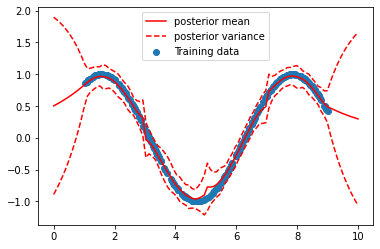

In [8]:
# display tree structure
print(lgrt_gp)

# plot
beta = 2
plt.figure()
plt.scatter(xtr, ytr)
plt.plot(xte, mu,'r')
plt.plot(xte, mu + beta*s2,'r--')
plt.legend(['posterior mean',  'posterior variance', 'Training data',])
plt.plot(xte, mu - beta*s2, 'r--')
plt.show()
